In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df=df.iloc[:,2:]

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],
                                               test_size=0.3,random_state=42)

In [6]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [7]:
scaler=StandardScaler()
#here fit means we are calculating means and std
scaler.fit(X_train)

#using transform we will transform the values
X_train_scaled=scaler.transform(X_train) 
X_test_scaled=scaler.transform(X_test)


In [8]:
scaler.mean_, (scaler.var_)**0.5

(array([3.75750000e+01, 7.05892857e+04]),
 array([1.01777813e+01, 3.38878280e+04]))

In [9]:


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)



In [10]:
np.round(X_train.describe(), 1), np.round(X_train_scaled.describe(), 1)

(         Age  EstimatedSalary
 count  280.0            280.0
 mean    37.6          70589.3
 std     10.2          33948.5
 min     18.0          15000.0
 25%     30.0          44000.0
 50%     37.0          71000.0
 75%     45.0          88000.0
 max     60.0         150000.0,
          Age  EstimatedSalary
 count  280.0            280.0
 mean    -0.0              0.0
 std      1.0              1.0
 min     -1.9             -1.6
 25%     -0.7             -0.8
 50%     -0.1              0.0
 75%      0.7              0.5
 max      2.2              2.3)

In [21]:
y_train.head

<bound method NDFrame.head of 157    0
109    0
17     1
347    1
24     1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 280, dtype: int64>

Text(0.5, 1.0, 'After Scaling')

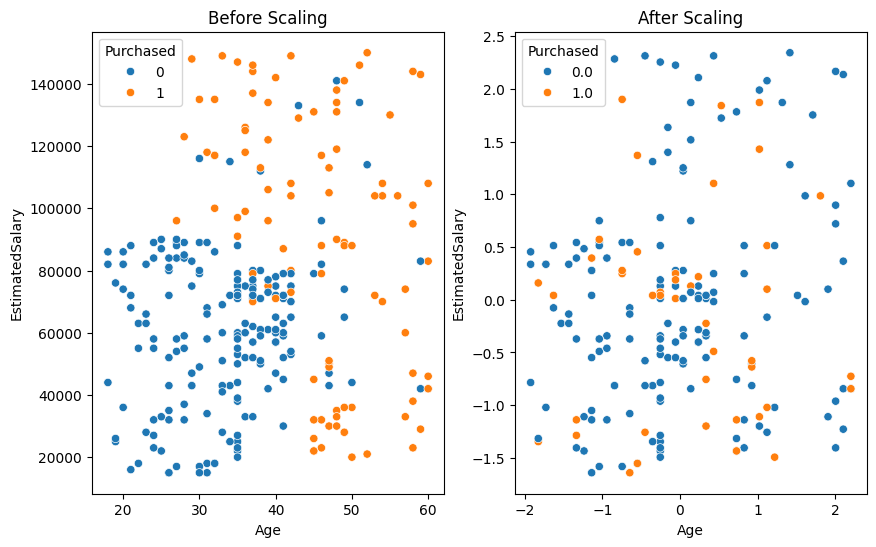

In [25]:
import matplotlib.pyplot as plt
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(10,6))

sns.scatterplot(x=X_train['Age'],y=X_train['EstimatedSalary'],hue=y_train,ax=ax1)
ax1.set_title('Before Scaling')
sns.scatterplot(x=X_train_scaled['Age'],y=X_train_scaled['EstimatedSalary'],hue=y_train,ax=ax2)
ax2.set_title('After Scaling')

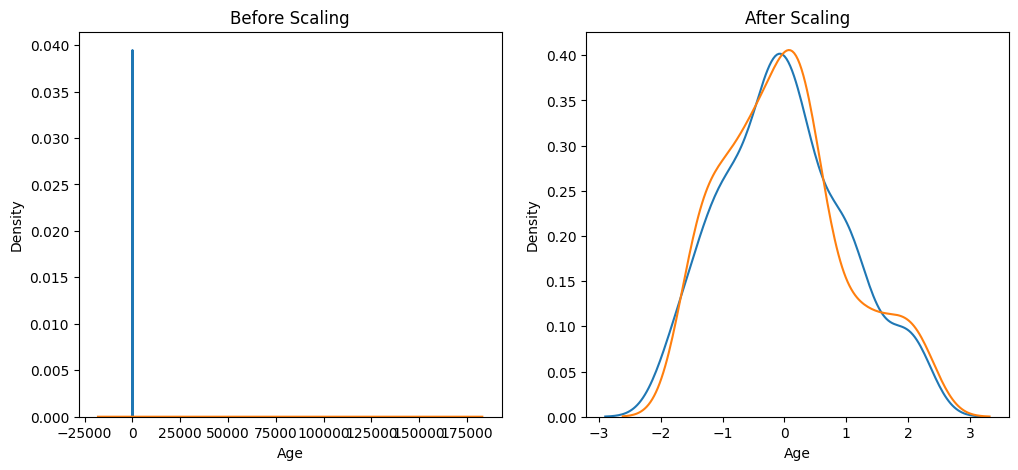

In [26]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Checking the importance of Scaling

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [29]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [31]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.85
Scaled 0.85


In [ ]:
# No Chnage